In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, svd, eig, inv
import random

In [44]:
def power_method(A, p=2, epsilon=1e-4, max_iter=10, seed=1):
    n = A.shape[0]
    while True:
        np.random.seed(seed*100)
        z = np.random.rand(n) 
        w = A @ z
        max_wi = np.max(np.abs(w))
        error = norm(w - max_wi * z, ord=p)
        if error >= 1e-8:
            break
        it += 100
    
    z_init = z
    errors = []
    for _ in range(max_iter):
        w = A @ z
        z = w / norm(w, ord=p)
        lambda_est = np.dot(z, A @ z)
        error = norm(A @ z - lambda_est * z, ord=p)
        errors.append(error)
        if error < epsilon:
            break

    return z_init, lambda_est, errors

In [3]:
def custom_svd(A):
    AAT = A @ A.T
    D_vals, U = eig(AAT)
    D = np.diag(np.sqrt(np.abs(D_vals)))  
    D_inv = np.diag([1/d if d != 0 else 0 for d in np.diag(D)])
    V = A.T @ U @ D_inv
    return U, D, V

In [34]:
def plot_errors(all_errors, ps, Z):
    for i, p in enumerate(ps):
        plt.figure(figsize=(12, 4))
        for j in range(3):
            print(Z[p][j])
            plt.subplot(1, 3, j+1)
            plt.plot(all_errors[p][j])
            plt.xlabel("Iteracja")
            plt.ylabel("Błąd")
            plt.title(f"p={p}")
#             plt.yscale('log')
            plt.grid()
        plt.tight_layout()
        plt.show()

In [5]:
def compare_svd_accuracy(A, p):
    U_custom, D_custom, V_custom = custom_svd(A)
    A_custom = U_custom @ D_custom @ V_custom.T
    U_np, S_np, Vt_np = svd(A)
    A_np = U_np @ np.diag(S_np) @ Vt_np
    error = norm(A_custom - A_np, ord=p)
    return error

In [36]:
# Macierz A
np.random.seed(20010801)
A = np.array([[np.random.randint(1, 100) for i in range(3)] for j in range(3)])

print(A)

[[73 70 19]
 [67 88  1]
 [34 42 48]]


[0.5488135  0.71518937 0.60276338]
[0.54340494 0.27836939 0.42451759]
[0.94763226 0.22654742 0.59442014]


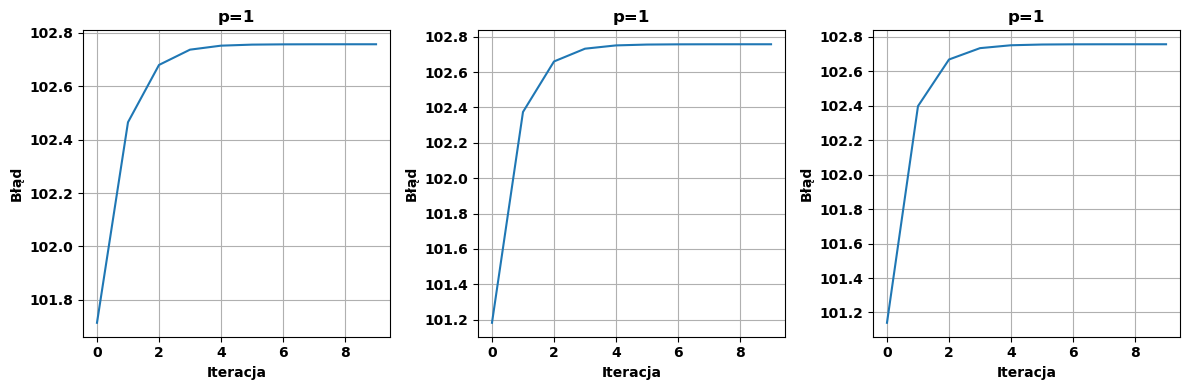

[0.5488135  0.71518937 0.60276338]
[0.54340494 0.27836939 0.42451759]
[0.94763226 0.22654742 0.59442014]


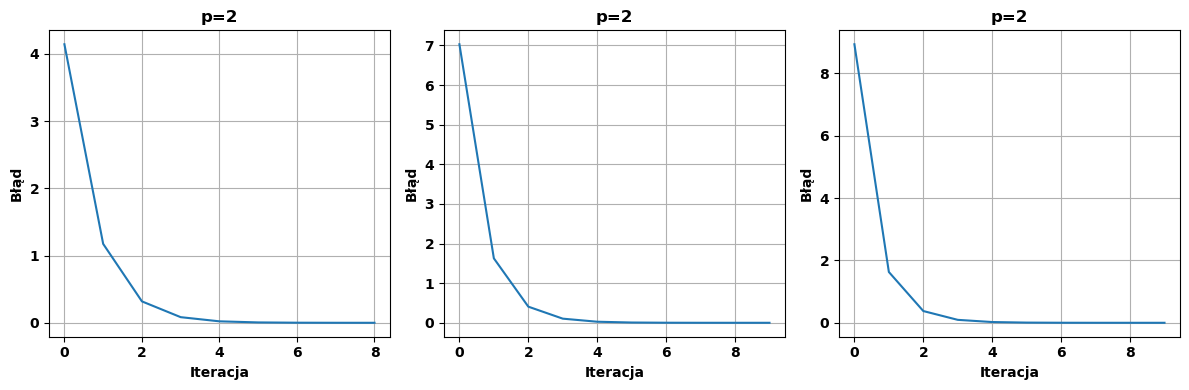

[0.5488135  0.71518937 0.60276338]
[0.54340494 0.27836939 0.42451759]
[0.94763226 0.22654742 0.59442014]


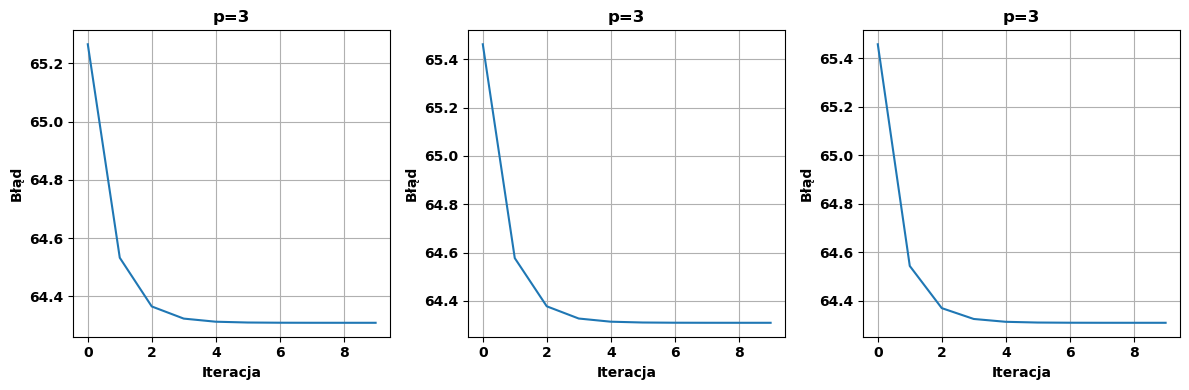

[0.5488135  0.71518937 0.60276338]
[0.54340494 0.27836939 0.42451759]
[0.94763226 0.22654742 0.59442014]


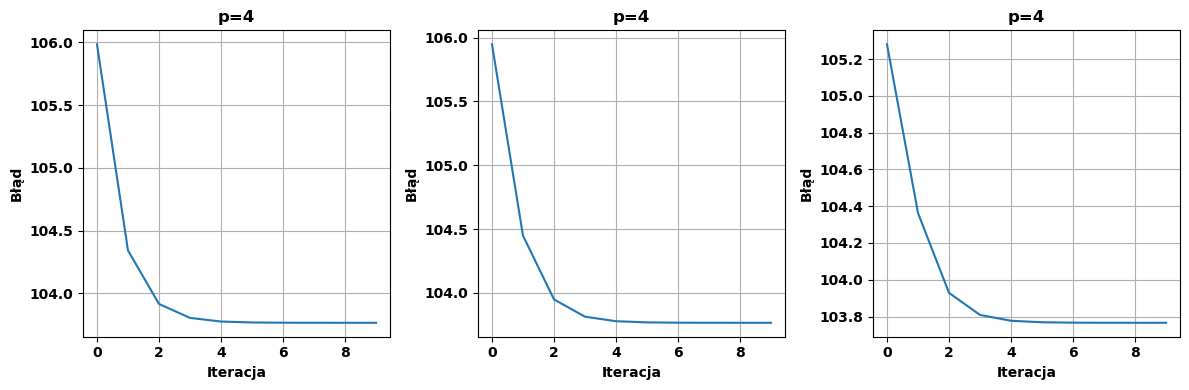

[0.5488135  0.71518937 0.60276338]
[0.54340494 0.27836939 0.42451759]
[0.94763226 0.22654742 0.59442014]


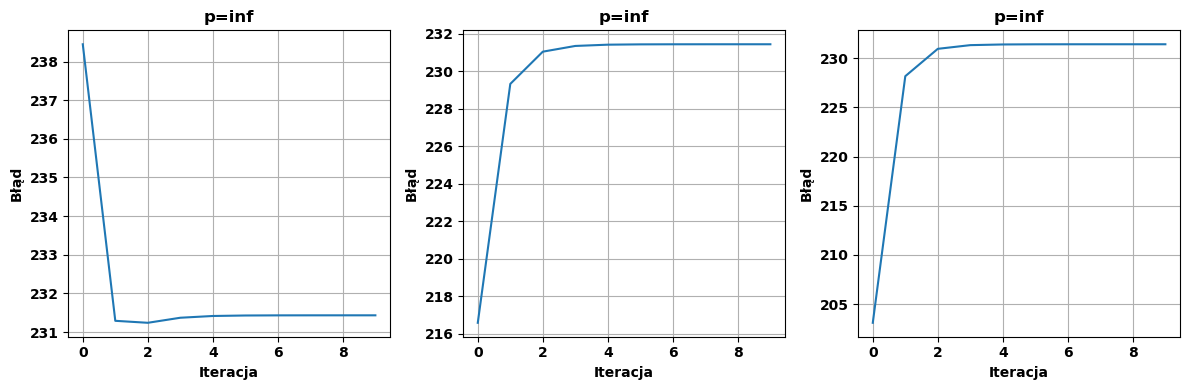

In [45]:
# Wartości p-norm
ps = [1, 2, 3, 4, np.inf]

# 3 uruchomienia metody potęgowej dla każdej normy
all_errors = {}
Z = {}
for p in ps:
    all_errors[p] = []
    Z[p] = []
    for j in range(3):
        z, _, errors = power_method(A, p=p, epsilon=1e-4, seed=j)
        all_errors[p].append(errors)
        Z[p].append(z)

# Wykresy błędów
plot_errors(all_errors, ps, Z)

In [17]:
ps1 = [1, 2, np.inf]

# Porównanie SVD
print("Porównanie dokładności SVD:")
for p in ps1:
    error = compare_svd_accuracy(A, p)
    print(f"Norma p={p}: ||UDV - SVD(A)||_p = {error:.4e}")

Porównanie dokładności SVD:
Norma p=1: ||UDV - SVD(A)||_p = 1.1369e-13
Norma p=2: ||UDV - SVD(A)||_p = 1.1612e-13
Norma p=inf: ||UDV - SVD(A)||_p = 1.6342e-13


In [47]:
U, D, V = custom_svd(A)

In [48]:
print(U)

[[ 0.63391397  0.77334425 -0.00957834]
 [ 0.67081645 -0.5559508  -0.49084009]
 [ 0.38491344 -0.30472508  0.87119703]]


In [49]:
print(D)

[[161.7109745    0.           0.        ]
 [  0.          11.66394013   0.        ]
 [  0.           0.          41.97038511]]


In [50]:
print(V)

[[ 0.64502412  0.75830068 -0.09446674]
 [ 0.73941915 -0.65055432 -0.17331592]
 [ 0.19288133 -0.04194243  0.98032527]]
